### Ratio-metric

$R(U)=\frac{\sum_{u\in U}X(u)}{\sum_{u\in U}Y(u)}$

- Bootstrap 
- [Linearization](https://www.stat.cmu.edu/~hseltman/files/ratio.pdf)
- [Delta-method](https://arxiv.org/pdf/1803.06336.pdf)

### Comparing Nominal Type I Error rates

In [1]:
import numpy as np
import numpy.random as npr

In [2]:
n1=38 #size x
n2=22 #size y
sd1=1.11 #sd x
sd2=1.84 #sd y 
 
m1 = 0 # true
m2 = 0 # true

trueD = (m2 - m1) / (np.sqrt((((n1 - 1) * ((sd1 ** 2))) +
                           (n2 - 1) * ((sd2 ** 2))) / ((n1 + n2) - 2)))
trueD

0.0

In [3]:
sim_x = npr.normal(m1, sd1, n1)  # simulate participants condition x
sim_y = npr.normal(m2, sd2, n2)  # simulate participants condition y

In [4]:
import scipy.stats as sp

In [5]:
sp.ttest_ind(sim_x,sim_y, equal_var=True) #t-test

Ttest_indResult(statistic=-1.0549143758531334, pvalue=0.29583913226541814)

In [6]:
sp.ttest_ind(sim_x,sim_y, equal_var=False) #Welch

Ttest_indResult(statistic=-0.8639366295067997, pvalue=0.39585312059790423)

In [7]:
import pingouin as pg

In [8]:
pg.ttest(sim_x,sim_y, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.054914,58,two-sided,0.295839,"[-1.17, 0.36]",0.282611,0.429,0.179507


In [9]:
pg.ttest(sim_x,sim_y, correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.863937,24.948425,two-sided,0.395853,"[-1.37, 0.56]",0.282611,0.369,0.179507


In [10]:
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import mannwhitneyu

In [11]:
ttest_ind(sim_x, sim_y,usevar='pooled')

(-1.0549143758531336, 0.29583913226541814, 58.0)

In [12]:
sp.levene(sim_x, sim_y, center='mean')
#     ‘median’: recommended for skewed distributions.
#     ‘mean’: recommended for symmetric, moderate-tailed distributions.
#     ‘trimmed’: recommended for heavy-tailed distributions.

LeveneResult(statistic=19.86990279880302, pvalue=3.8507897683616645e-05)

In [13]:
ttest_ind(sim_x, sim_y,usevar='unequal')

(-0.8639366295067998, 0.39585312059790423, 24.948425310198846)

In [14]:
mannwhitneyu(sim_x, sim_y, method='exact')

MannwhitneyuResult(statistic=363.0, pvalue=0.4061751221843095)

In [15]:
# create variables for dataframe
nSims = 5000 
# set up empty container for all simulated Student's t-test p-values
p1 = [] 
# set up empty container for all simulated Welch's t-test p-values
p2 = [] 
# set up empty container for all simulated MW's p-values 
p3 = []
# set up empty container for all Levene's t-test p-values
pvalueLevene = [] 
for i in range(1, nSims):
    # for each simulated experiment
    sim_x = npr.normal(m1, sd1, n1)  # simulate participants condition x
    sim_y = npr.normal(m2, sd2, n2)  # simulate participants condition y
    # perform Student and Welch t-test and MW
    # perform the tests and store p-value
    p1.append(ttest_ind(sim_x,sim_y, usevar='pooled')[1])
    p2.append(ttest_ind(sim_x,sim_y, usevar='unequal')[1])
    p3.append(mannwhitneyu(sim_x, sim_y, method="exact")[1])

    # perform Levene's test
    pvalueLevene.append(sp.levene(sim_x,sim_y, center='mean')[1])

In [16]:
var_ratio = sd1 ** 2 / sd2 ** 2
var_ratio

0.3639236767485823

In [17]:
import matplotlib.pyplot as plt

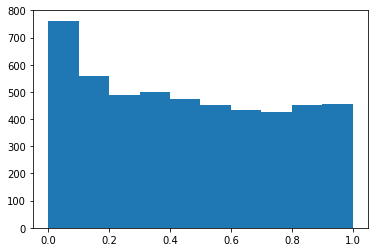

In [18]:
plt.hist(p1);

In [19]:
# Calculate Type 1 error in simulation for Student t-test
errorrate = sum(np.array(p1) < 0.05) / nSims * 100
errorrate

8.48

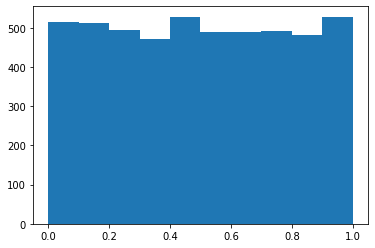

In [20]:
plt.hist(p2);

In [21]:
# Calculate Type 1 error in simulation for Welch t-test
errorrate = sum(np.array(p2) < 0.05) / nSims * 100
errorrate

5.46

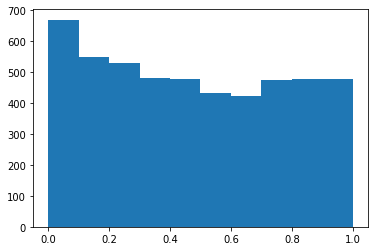

In [22]:
plt.hist(p3);

In [23]:
# Calculate Type 1 error in simulation for MW test
errorrate = sum(np.array(p3) < 0.05) / nSims * 100
errorrate

7.24

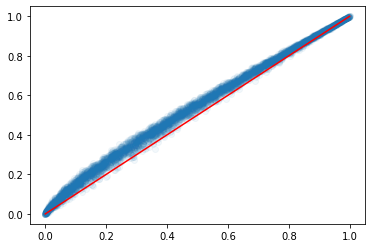

In [24]:
plt.scatter(p1,p2,alpha=0.05)
x = np.linspace(0, 1)
y = x
plt.plot(x, y, color='red');

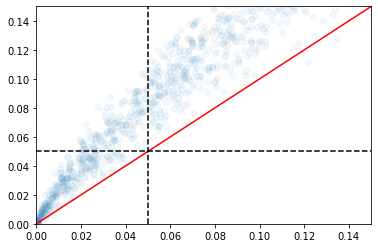

In [25]:
plt.scatter(p1,p2,alpha=0.05)
plt.xlim([0,0.15])
plt.ylim([0,0.15])
x = np.linspace(0, 1)
y = x
plt.plot(x, y, color='red')
plt.axhline(y=0.05, color='k', linestyle='--')
plt.axvline(x=0.05, color='k', linestyle='--')

In [26]:
observedpowerLevene = sum(np.array(pvalueLevene) < 0.05) / nSims * 100
observedpowerLevene

67.14